This notebook is used for generating different benchmark using the spectrum plot data.

Import required packages.

In [1]:
from time import sleep

from payload import generate_spectrum_pb, generate_spectrum_utf
from utils import convert_bytes, create_payload_size_df, create_decoding_time_df
from plots import plot_payload_size, plot_decoding_time
from producer import produce

#### Payload

Test

In [2]:
payload, size = generate_spectrum_utf(10)
print(payload, size)


b'{"timestamp": "2022-02-14 15:57:13", "x_min": 0, "x_max": 10, "y_min": 0, "y_max": 10, "channels": [0, 1, 2, 3, 4, 5, 6, 7, 8, 9], "power": [0.3, 5.2, 8.2, 0.3, 1.5, 0.6, 6.7, 2.8000000000000003, 6.7, 5.8], "sd_l": [0.46, 0.66, 0.17, 0.52, 0.71, 0.75, 0.52, 0.33, 0.83, 0.48], "sd_u": [0.25, 0.69, 0.77, 0.6, 0.7, 0.38, 0.53, 0.3, 0.44, 0.04]}' 376


In [3]:
channels = []
utf_payload_size = []
protobuf_payload_size = []
unit = "MB"

protobuf_payloads = []
utf_payloads = []

# 10000, 600000, 30000
for channel in range(25000, 610000, 25000):
    channels.append(channel)

    payload, size = generate_spectrum_utf(channel)
    utf_payload_size.append(convert_bytes(size, unit))
    utf_payloads.append(payload)

    payload, size = generate_spectrum_pb(channel)
    protobuf_payload_size.append(convert_bytes(size, unit))
    protobuf_payloads.append(payload)


In [4]:
# check
print(f"channels = {channels}, len(channels) = {len(channels)}")

channels = [25000, 50000, 75000, 100000, 125000, 150000, 175000, 200000, 225000, 250000, 275000, 300000, 325000, 350000, 375000, 400000, 425000, 450000, 475000, 500000, 525000, 550000, 575000, 600000], len(channels) = 24


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


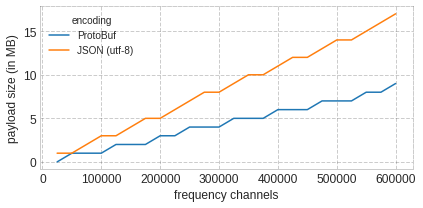

In [6]:
df = create_payload_size_df(channels, protobuf_payload_size, utf_payload_size)
plot_payload_size(df, unit)


#### Browser Performance

- Start performance recording at browser inspector 
- Send payloads to browser

Protobuf payload

In [17]:
for d in protobuf_payloads:
    sleep(1)
    await produce(d, "spectrum-pb")


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8ea6d94f0>


produce: sent, response = RecordMetadata(topic='spectrum-pb', partition=0, topic_partition=TopicPartition(topic='spectrum-pb', partition=0), offset=43, timestamp=1644764996695, timestamp_type=0)


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8eac728b0>


produce: sent, response = RecordMetadata(topic='spectrum-pb', partition=0, topic_partition=TopicPartition(topic='spectrum-pb', partition=0), offset=44, timestamp=1644764999922, timestamp_type=0)


Task was destroyed but it is pending!
task: <Task pending name='Task-126' coro=<Sender._sender_routine() running at /Users/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.8/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8eaab7e80>()]> cb=[Sender._fail_all()]>
Task was destroyed but it is pending!
task: <Task pending name='Task-137' coro=<Sender._sender_routine() running at /Users/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.8/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8eaab7640>()]> cb=[Sender._fail_all()]>
Task was destroyed but it is pending!
task: <Task pending name='Task-147' coro=<Sender._sender_routine() running at /Users/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.8/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8eaac5c10>()]>

Send payloads frequently to browser and calculate heap memory size

In [ ]:
for d in protobuf_payloads:
    sleep(0.1)
    await produce(d, "spectrum-pb")


JSON payload

In [64]:
for d in utf_payloads:
    sleep(1)
    await produce(d, "spectrum-utf")


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fda7468baf0>


produce: sent, response = RecordMetadata(topic='spectrum-utf', partition=0, topic_partition=TopicPartition(topic='spectrum-utf', partition=0), offset=145, timestamp=1644701772272, timestamp_type=0)


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fda7468baf0>


produce: sent, response = RecordMetadata(topic='spectrum-utf', partition=0, topic_partition=TopicPartition(topic='spectrum-utf', partition=0), offset=146, timestamp=1644701772624, timestamp_type=0)


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fda746fed60>


produce: sent, response = RecordMetadata(topic='spectrum-utf', partition=0, topic_partition=TopicPartition(topic='spectrum-utf', partition=0), offset=147, timestamp=1644701773247, timestamp_type=0)


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fda746e2ee0>


produce: sent, response = RecordMetadata(topic='spectrum-utf', partition=0, topic_partition=TopicPartition(topic='spectrum-utf', partition=0), offset=148, timestamp=1644701774148, timestamp_type=0)


Task was destroyed but it is pending!
task: <Task pending name='Task-6022' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fda75743820>()]> cb=[Sender._fail_all()]>
Task was destroyed but it is pending!
task: <Task pending name='Task-6032' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fda7495bdc0>()]> cb=[Sender._fail_all()]>
Task was destroyed but it is pending!
task: <Task pending name='Task-6042' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fda746e2070>()]>

produce: sent, response = RecordMetadata(topic='spectrum-utf', partition=0, topic_partition=TopicPartition(topic='spectrum-utf', partition=0), offset=149, timestamp=1644701775334, timestamp_type=0)


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fda77c3cbe0>


produce: sent, response = RecordMetadata(topic='spectrum-utf', partition=0, topic_partition=TopicPartition(topic='spectrum-utf', partition=0), offset=150, timestamp=1644701777045, timestamp_type=0)


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fda77c3cbe0>


produce: sent, response = RecordMetadata(topic='spectrum-utf', partition=0, topic_partition=TopicPartition(topic='spectrum-utf', partition=0), offset=151, timestamp=1644701778794, timestamp_type=0)


Task was destroyed but it is pending!
task: <Task pending name='Task-6072' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fda746ce910>()]> cb=[Sender._fail_all()]>
Task was destroyed but it is pending!
task: <Task pending name='Task-6082' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fda7495b4c0>()]> cb=[Sender._fail_all()]>
Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fda74c87430>


produce: sent, response = RecordMetadata(topic='spectrum-utf', partition=0, topic_partition=TopicPartition(topic='spectrum-utf', partition=0), offset=152, timestamp=1644701780907, timestamp_type=0)


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fda7748deb0>


produce: sent, response = RecordMetadata(topic='spectrum-utf', partition=0, topic_partition=TopicPartition(topic='spectrum-utf', partition=0), offset=153, timestamp=1644701783258, timestamp_type=0)


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fda77ff31c0>


produce: sent, response = RecordMetadata(topic='spectrum-utf', partition=0, topic_partition=TopicPartition(topic='spectrum-utf', partition=0), offset=154, timestamp=1644701785885, timestamp_type=0)


Task was destroyed but it is pending!
task: <Task pending name='Task-6112' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fda7468bfd0>()]> cb=[Sender._fail_all()]>
Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fda746e2b20>


produce: sent, response = RecordMetadata(topic='spectrum-utf', partition=0, topic_partition=TopicPartition(topic='spectrum-utf', partition=0), offset=155, timestamp=1644701788783, timestamp_type=0)


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fda74bc89d0>


produce: sent, response = RecordMetadata(topic='spectrum-utf', partition=0, topic_partition=TopicPartition(topic='spectrum-utf', partition=0), offset=156, timestamp=1644701791947, timestamp_type=0)


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fda77ff31c0>


produce: sent, response = RecordMetadata(topic='spectrum-utf', partition=0, topic_partition=TopicPartition(topic='spectrum-utf', partition=0), offset=157, timestamp=1644701795405, timestamp_type=0)


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fda80b2a760>


produce: sent, response = RecordMetadata(topic='spectrum-utf', partition=0, topic_partition=TopicPartition(topic='spectrum-utf', partition=0), offset=158, timestamp=1644701799117, timestamp_type=0)


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fda77ff31c0>


produce: sent, response = RecordMetadata(topic='spectrum-utf', partition=0, topic_partition=TopicPartition(topic='spectrum-utf', partition=0), offset=159, timestamp=1644701803103, timestamp_type=0)


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fda7561c1c0>


produce: sent, response = RecordMetadata(topic='spectrum-utf', partition=0, topic_partition=TopicPartition(topic='spectrum-utf', partition=0), offset=160, timestamp=1644701807382, timestamp_type=0)


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fda80b2a760>


produce: sent, response = RecordMetadata(topic='spectrum-utf', partition=0, topic_partition=TopicPartition(topic='spectrum-utf', partition=0), offset=161, timestamp=1644701811936, timestamp_type=0)


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fda7561c1c0>


produce: sent, response = RecordMetadata(topic='spectrum-utf', partition=0, topic_partition=TopicPartition(topic='spectrum-utf', partition=0), offset=162, timestamp=1644701816757, timestamp_type=0)


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fda7561c1c0>


produce: sent, response = RecordMetadata(topic='spectrum-utf', partition=0, topic_partition=TopicPartition(topic='spectrum-utf', partition=0), offset=163, timestamp=1644701821869, timestamp_type=0)


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fda74433be0>


produce: sent, response = RecordMetadata(topic='spectrum-utf', partition=0, topic_partition=TopicPartition(topic='spectrum-utf', partition=0), offset=164, timestamp=1644701827278, timestamp_type=0)


Task was destroyed but it is pending!
task: <Task pending name='Task-6062' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fda746ceb50>()]> cb=[Sender._fail_all()]>
Task was destroyed but it is pending!
task: <Task pending name='Task-6092' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fda804ae6a0>()]> cb=[Sender._fail_all()]>
Task was destroyed but it is pending!
task: <Task pending name='Task-6102' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fda762e3ee0>()]>

#### Deserialisation Cost

Send each Protobuf payload 10 times and collect decoding/deserialisation time.

In [10]:
num_iter = 10

In [6]:
for idx in range(len(channels)):
    for d in range(num_iter):
        sleep(2)
        print(f"idx = {idx}, channels[idx] = {channels[idx]}")
        await produce(pb_payloads[idx], "spectrum-pb")

    sleep(5)


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8be1b4fa0>


idx = 0, channels[idx] = 25000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8be1b90d0>


idx = 0, channels[idx] = 25000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8be1b9e80>


idx = 0, channels[idx] = 25000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8be1b9e80>


idx = 0, channels[idx] = 25000


Task was destroyed but it is pending!
task: <Task pending name='Task-53' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8be1b9910>()]> cb=[Sender._fail_all()]>
Task was destroyed but it is pending!
task: <Task pending name='Task-63' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8be1b9310>()]> cb=[Sender._fail_all()]>
Task was destroyed but it is pending!
task: <Task pending name='Task-73' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8be1b9cd0>()]> cb=[S

idx = 0, channels[idx] = 25000


Task was destroyed but it is pending!
task: <Task pending name='Task-93' coro=<Sender._sender_routine() done, defined at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:81> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8be186cd0>()]> cb=[Sender._fail_all()]>
Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8be186670>


idx = 0, channels[idx] = 25000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8c3eb00a0>


idx = 0, channels[idx] = 25000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bf0f4850>


idx = 0, channels[idx] = 25000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8be21d8e0>


idx = 0, channels[idx] = 25000


Task was destroyed but it is pending!
task: <Task pending name='Task-113' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8bedc3b20>()]> cb=[Sender._fail_all()]>
Task was destroyed but it is pending!
task: <Task pending name='Task-123' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8be221670>()]> cb=[Sender._fail_all()]>
Task was destroyed but it is pending!
task: <Task pending name='Task-133' coro=<Sender._sender_routine() done, defined at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:81> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8bf146c40>()

idx = 0, channels[idx] = 25000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8c1cbb700>


idx = 1, channels[idx] = 50000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8be1e7400>


idx = 1, channels[idx] = 50000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bf13f9a0>


idx = 1, channels[idx] = 50000


Task was destroyed but it is pending!
task: <Task pending name='Task-153' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8be206f10>()]> cb=[Sender._fail_all()]>
Task was destroyed but it is pending!
task: <Task pending name='Task-163' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8bee12b50>()]> cb=[Sender._fail_all()]>
Task was destroyed but it is pending!
task: <Task pending name='Task-173' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8bee54040>()]> cb

idx = 1, channels[idx] = 50000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8f2f44730>


idx = 1, channels[idx] = 50000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bf084d60>


idx = 1, channels[idx] = 50000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8be206f10>


idx = 1, channels[idx] = 50000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8be21b850>


idx = 1, channels[idx] = 50000


Task was destroyed but it is pending!
task: <Task pending name='Task-193' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8bf084af0>()]> cb=[Sender._fail_all()]>
Task was destroyed but it is pending!
task: <Task pending name='Task-203' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8bf084d30>()]> cb=[Sender._fail_all()]>
Task was destroyed but it is pending!
task: <Task pending name='Task-213' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8be21bc10>()]> cb

idx = 1, channels[idx] = 50000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8be21b610>


idx = 1, channels[idx] = 50000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bdf714c0>


idx = 2, channels[idx] = 75000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bdf71880>


idx = 2, channels[idx] = 75000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bdf711c0>


idx = 2, channels[idx] = 75000


Task was destroyed but it is pending!
task: <Task pending name='Task-243' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8be1b97f0>()]> cb=[Sender._fail_all()]>
Task was destroyed but it is pending!
task: <Task pending name='Task-253' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8bdf71040>()]> cb=[Sender._fail_all()]>
Task was destroyed but it is pending!
task: <Task pending name='Task-263' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8bdf71f70>()]> cb

idx = 2, channels[idx] = 75000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bdf711c0>
Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bdf71040>


idx = 2, channels[idx] = 75000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bdf71bb0>


idx = 2, channels[idx] = 75000
idx = 2, channels[idx] = 75000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bdf71040>
Task was destroyed but it is pending!
task: <Task pending name='Task-293' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8bdef5040>()]> cb=[Sender._fail_all()]>
Task was destroyed but it is pending!
task: <Task pending name='Task-303' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8bdef5dc0>()]> cb=[Sender._fail_all()]>
Task was destroyed but it is pending!
task: <Task pending name='Task-313' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/p

idx = 2, channels[idx] = 75000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bdeace50>


idx = 2, channels[idx] = 75000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bdeac7f0>


idx = 2, channels[idx] = 75000
idx = 3, channels[idx] = 100000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bde46850>


idx = 3, channels[idx] = 100000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bde46130>
Task was destroyed but it is pending!
task: <Task pending name='Task-333' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8bdef5850>()]> cb=[Sender._fail_all()]>
Task was destroyed but it is pending!
task: <Task pending name='Task-343' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8bde463d0>()]> cb=[Sender._fail_all()]>
Task was destroyed but it is pending!
task: <Task pending name='Task-353' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/p

idx = 3, channels[idx] = 100000
idx = 3, channels[idx] = 100000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bde469d0>


idx = 3, channels[idx] = 100000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bddb1400>
Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bddbd490>


idx = 3, channels[idx] = 100000


Task was destroyed but it is pending!
task: <Task pending name='Task-383' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8bddb17c0>()]> cb=[Sender._fail_all()]>
Task was destroyed but it is pending!
task: <Task pending name='Task-393' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8bddb1c10>()]> cb=[Sender._fail_all()]>
Task was destroyed but it is pending!
task: <Task pending name='Task-403' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8bddbd040>()]> cb

idx = 3, channels[idx] = 100000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bddbd850>


idx = 3, channels[idx] = 100000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bddbdca0>


idx = 3, channels[idx] = 100000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bddbdb20>
Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bdd03190>


idx = 3, channels[idx] = 100000
idx = 4, channels[idx] = 125000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bddbdb20>
Task was destroyed but it is pending!
task: <Task pending name='Task-423' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8bddb1250>()]> cb=[Sender._fail_all()]>
Task was destroyed but it is pending!
task: <Task pending name='Task-433' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8bdd03820>()]> cb=[Sender._fail_all()]>
Task was destroyed but it is pending!
task: <Task pending name='Task-443' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/p

idx = 4, channels[idx] = 125000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bdd03a90>


idx = 4, channels[idx] = 125000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bdd03a60>


idx = 4, channels[idx] = 125000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bdc6d1f0>


idx = 4, channels[idx] = 125000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bdc6dcd0>
Task was destroyed but it is pending!
task: <Task pending name='Task-473' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8bdc6d070>()]> cb=[Sender._fail_all()]>
Task was destroyed but it is pending!
task: <Task pending name='Task-483' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8bdc6d340>()]> cb=[Sender._fail_all()]>
Task was destroyed but it is pending!
task: <Task pending name='Task-493' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/p

idx = 4, channels[idx] = 125000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bdbfb910>


idx = 4, channels[idx] = 125000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bdbfb190>


idx = 4, channels[idx] = 125000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bdbfb370>


idx = 4, channels[idx] = 125000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bdbc8250>


idx = 4, channels[idx] = 125000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bdbc80a0>
Task was destroyed but it is pending!
task: <Task pending name='Task-513' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8bdc6dcd0>()]> cb=[Sender._fail_all()]>
Task was destroyed but it is pending!
task: <Task pending name='Task-523' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8bdbc85b0>()]> cb=[Sender._fail_all()]>
Task was destroyed but it is pending!
task: <Task pending name='Task-533' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/p

idx = 5, channels[idx] = 150000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bdb301c0>


idx = 5, channels[idx] = 150000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bdbc8a90>


idx = 5, channels[idx] = 150000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bdb300a0>


idx = 5, channels[idx] = 150000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bdb30be0>
Task was destroyed but it is pending!
task: <Task pending name='Task-563' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8bdb30a60>()]> cb=[Sender._fail_all()]>
Task was destroyed but it is pending!
task: <Task pending name='Task-573' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8bdb30730>()]> cb=[Sender._fail_all()]>
Task was destroyed but it is pending!
task: <Task pending name='Task-583' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/p

idx = 5, channels[idx] = 150000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bdabd1c0>
Task was destroyed but it is pending!
task: <Task pending name='Task-103' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8bf15adc0>()]> cb=[Sender._fail_all()]>
Task was destroyed but it is pending!
task: <Task pending name='Task-143' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8c1e2bdc0>()]> cb=[Sender._fail_all()]>
Task was destroyed but it is pending!
task: <Task pending name='Task-183' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/p

idx = 5, channels[idx] = 150000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bdabd6d0>


idx = 5, channels[idx] = 150000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bdeacc10>


idx = 5, channels[idx] = 150000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8f2f44610>


idx = 5, channels[idx] = 150000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bdabd4c0>
Task was destroyed but it is pending!
task: <Task pending name='Task-613' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8be186a60>()]> cb=[Sender._fail_all()]>
Task was destroyed but it is pending!
task: <Task pending name='Task-623' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8bdabd6d0>()]> cb=[Sender._fail_all()]>
Task was destroyed but it is pending!
task: <Task pending name='Task-633' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/p

idx = 5, channels[idx] = 150000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bdabd5b0>


idx = 6, channels[idx] = 175000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bddbda60>


idx = 6, channels[idx] = 175000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bda88370>


idx = 6, channels[idx] = 175000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bda88880>


idx = 6, channels[idx] = 175000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bda88850>
Task was destroyed but it is pending!
task: <Task pending name='Task-653' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8bdabd4f0>()]> cb=[Sender._fail_all()]>
Task was destroyed but it is pending!
task: <Task pending name='Task-663' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8bda88040>()]> cb=[Sender._fail_all()]>
Task was destroyed but it is pending!
task: <Task pending name='Task-673' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/p

idx = 6, channels[idx] = 175000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bcfe4640>


idx = 6, channels[idx] = 175000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bda88040>


idx = 6, channels[idx] = 175000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bcfe4b80>


idx = 6, channels[idx] = 175000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bda88340>
Task was destroyed but it is pending!
task: <Task pending name='Task-703' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8bcfe4d30>()]> cb=[Sender._fail_all()]>
Task was destroyed but it is pending!
task: <Task pending name='Task-713' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8bcfe4f40>()]> cb=[Sender._fail_all()]>
Task was destroyed but it is pending!
task: <Task pending name='Task-723' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/p

idx = 6, channels[idx] = 175000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bcf9dd60>


idx = 6, channels[idx] = 175000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bcf9d2b0>


idx = 7, channels[idx] = 200000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bcf9dfa0>


idx = 7, channels[idx] = 200000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bcebd430>


idx = 7, channels[idx] = 200000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bcebd4f0>
Task was destroyed but it is pending!
task: <Task pending name='Task-743' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8bcfe4520>()]> cb=[Sender._fail_all()]>
Task was destroyed but it is pending!
task: <Task pending name='Task-753' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8bcebd940>()]> cb=[Sender._fail_all()]>
Task was destroyed but it is pending!
task: <Task pending name='Task-763' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/p

idx = 7, channels[idx] = 200000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bcebd4f0>


idx = 7, channels[idx] = 200000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bcebd0a0>


idx = 7, channels[idx] = 200000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bcea4310>


idx = 7, channels[idx] = 200000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bce5f760>
Task was destroyed but it is pending!
task: <Task pending name='Task-793' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8bcea4220>()]> cb=[Sender._fail_all()]>
Task was destroyed but it is pending!
task: <Task pending name='Task-803' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8bcea4880>()]> cb=[Sender._fail_all()]>
Task was destroyed but it is pending!
task: <Task pending name='Task-813' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/p

idx = 7, channels[idx] = 200000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bce5fe80>


idx = 7, channels[idx] = 200000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bce5fb50>


idx = 7, channels[idx] = 200000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bce5ff10>


idx = 8, channels[idx] = 225000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bcd7cb20>


idx = 8, channels[idx] = 225000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bcd7ce50>
Task was destroyed but it is pending!
task: <Task pending name='Task-833' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8bcea4be0>()]> cb=[Sender._fail_all()]>
Task was destroyed but it is pending!
task: <Task pending name='Task-843' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8bcd7c4c0>()]> cb=[Sender._fail_all()]>
Task was destroyed but it is pending!
task: <Task pending name='Task-853' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/p

idx = 8, channels[idx] = 225000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bcd68670>


idx = 8, channels[idx] = 225000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bcd7c4c0>


idx = 8, channels[idx] = 225000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bcd68fa0>


idx = 8, channels[idx] = 225000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bccf4580>
Task was destroyed but it is pending!
task: <Task pending name='Task-883' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8bcd68b20>()]> cb=[Sender._fail_all()]>
Task was destroyed but it is pending!
task: <Task pending name='Task-893' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8bcd68040>()]> cb=[Sender._fail_all()]>
Task was destroyed but it is pending!
task: <Task pending name='Task-903' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/p

idx = 8, channels[idx] = 225000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bccf4be0>


idx = 8, channels[idx] = 225000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bccf4f10>


idx = 8, channels[idx] = 225000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bce5fc10>


idx = 8, channels[idx] = 225000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bcc411f0>


idx = 9, channels[idx] = 250000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bcc41610>
Task was destroyed but it is pending!
task: <Task pending name='Task-923' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8bcd68040>()]> cb=[Sender._fail_all()]>
Task was destroyed but it is pending!
task: <Task pending name='Task-933' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8bcc41070>()]> cb=[Sender._fail_all()]>
Task was destroyed but it is pending!
task: <Task pending name='Task-943' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/p

idx = 9, channels[idx] = 250000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bcc41610>


idx = 9, channels[idx] = 250000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bcc41610>


idx = 9, channels[idx] = 250000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bcc2f070>


idx = 9, channels[idx] = 250000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bcc2fa30>


idx = 9, channels[idx] = 250000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bcb361f0>
Task was destroyed but it is pending!
task: <Task pending name='Task-973' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8bcc2f760>()]> cb=[Sender._fail_all()]>
Task was destroyed but it is pending!
task: <Task pending name='Task-983' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8bcc2fee0>()]> cb=[Sender._fail_all()]>
Task was destroyed but it is pending!
task: <Task pending name='Task-993' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/p

idx = 9, channels[idx] = 250000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bcb368e0>


idx = 9, channels[idx] = 250000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bcc2fcd0>


idx = 9, channels[idx] = 250000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bcb02850>
Task was destroyed but it is pending!
task: <Task pending name='Task-1023' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8bcc2f2e0>()]> cb=[Sender._fail_all()]>
Task was destroyed but it is pending!
task: <Task pending name='Task-1033' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8bcb023d0>()]> cb=[Sender._fail_all()]>


idx = 9, channels[idx] = 250000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bcb027c0>


idx = 10, channels[idx] = 275000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bcc2f070>


idx = 10, channels[idx] = 275000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bca8e3d0>


idx = 10, channels[idx] = 275000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bca8efa0>


idx = 10, channels[idx] = 275000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bca8e910>
Task was destroyed but it is pending!
task: <Task pending name='Task-1053' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8bcb02100>()]> cb=[Sender._fail_all()]>
Task was destroyed but it is pending!
task: <Task pending name='Task-1063' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8bca8ea30>()]> cb=[Sender._fail_all()]>
Task was destroyed but it is pending!
task: <Task pending name='Task-1073' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafk

idx = 10, channels[idx] = 275000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bc9f7460>


idx = 10, channels[idx] = 275000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bca8ebb0>


idx = 10, channels[idx] = 275000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bc9f7820>


idx = 10, channels[idx] = 275000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bca34670>
Task was destroyed but it is pending!
task: <Task pending name='Task-1103' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8bc9f7d60>()]> cb=[Sender._fail_all()]>
Task was destroyed but it is pending!
task: <Task pending name='Task-1113' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8bca34100>()]> cb=[Sender._fail_all()]>
Task was destroyed but it is pending!
task: <Task pending name='Task-1123' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafk

idx = 10, channels[idx] = 275000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bca34eb0>


idx = 10, channels[idx] = 275000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bc9f7370>


idx = 11, channels[idx] = 300000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bc9af490>
Task was destroyed but it is pending!
task: <Task pending name='Task-1143' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8bca34ee0>()]> cb=[Sender._fail_all()]>
Task was destroyed but it is pending!
task: <Task pending name='Task-1153' coro=<Sender._sender_routine() done, defined at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:81> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8bc9af6a0>()]> cb=[Sender._fail_all()]>
Task was destroyed but it is pending!
task: <Task pending name='Task-603' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aio

idx = 11, channels[idx] = 300000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8be186880>


idx = 11, channels[idx] = 300000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bcb36f70>


idx = 11, channels[idx] = 300000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bca8e610>
Task was destroyed but it is pending!
task: <Task pending name='Task-1173' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8bcd7c340>()]> cb=[Sender._fail_all()]>
Task was destroyed but it is pending!
task: <Task pending name='Task-1183' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8bcb36f70>()]> cb=[Sender._fail_all()]>


idx = 11, channels[idx] = 300000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bdabd970>


idx = 11, channels[idx] = 300000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bccf49d0>


idx = 11, channels[idx] = 300000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bc9afc70>
Task was destroyed but it is pending!
task: <Task pending name='Task-1203' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8bc9af070>()]> cb=[Sender._fail_all()]>
Task was destroyed but it is pending!
task: <Task pending name='Task-1213' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8bc9afc10>()]> cb=[Sender._fail_all()]>


idx = 11, channels[idx] = 300000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bca34b50>


idx = 11, channels[idx] = 300000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bc9aff70>


idx = 11, channels[idx] = 300000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8be137b80>
Task was destroyed but it is pending!
task: <Task pending name='Task-1233' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8be1375b0>()]> cb=[Sender._fail_all()]>
Task was destroyed but it is pending!
task: <Task pending name='Task-1243' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8be137f10>()]> cb=[Sender._fail_all()]>


idx = 12, channels[idx] = 325000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8be137fa0>


idx = 12, channels[idx] = 325000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8be137c40>


idx = 12, channels[idx] = 325000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bc8119d0>


idx = 12, channels[idx] = 325000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bc811eb0>
Task was destroyed but it is pending!
task: <Task pending name='Task-1263' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8bc8115e0>()]> cb=[Sender._fail_all()]>
Task was destroyed but it is pending!
task: <Task pending name='Task-1273' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8bc811820>()]> cb=[Sender._fail_all()]>
Task was destroyed but it is pending!
task: <Task pending name='Task-1283' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafk

idx = 12, channels[idx] = 325000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bdfb6190>


idx = 12, channels[idx] = 325000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bdfb6520>


idx = 12, channels[idx] = 325000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bdfb6280>
Task was destroyed but it is pending!
task: <Task pending name='Task-1303' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8bdfb6790>()]> cb=[Sender._fail_all()]>
Task was destroyed but it is pending!
task: <Task pending name='Task-1313' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8bc722130>()]> cb=[Sender._fail_all()]>


idx = 12, channels[idx] = 325000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bc722340>


idx = 12, channels[idx] = 325000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bc722f40>


idx = 12, channels[idx] = 325000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bc722280>
Task was destroyed but it is pending!
task: <Task pending name='Task-1333' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8bdef5880>()]> cb=[Sender._fail_all()]>
Task was destroyed but it is pending!
task: <Task pending name='Task-1343' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8bc6ec370>()]> cb=[Sender._fail_all()]>


idx = 13, channels[idx] = 350000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bc6ec790>


idx = 13, channels[idx] = 350000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bc6ec070>


idx = 13, channels[idx] = 350000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bc6ec370>
Task was destroyed but it is pending!
task: <Task pending name='Task-1363' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8bc6ecfd0>()]> cb=[Sender._fail_all()]>
Task was destroyed but it is pending!
task: <Task pending name='Task-1373' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8bc674040>()]> cb=[Sender._fail_all()]>


idx = 13, channels[idx] = 350000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bc674280>


idx = 13, channels[idx] = 350000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bc6745b0>


idx = 13, channels[idx] = 350000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bc674e20>
Task was destroyed but it is pending!
task: <Task pending name='Task-1393' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8bc674c40>()]> cb=[Sender._fail_all()]>
Task was destroyed but it is pending!
task: <Task pending name='Task-1403' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8bbb94040>()]> cb=[Sender._fail_all()]>


idx = 13, channels[idx] = 350000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bbb94910>


idx = 13, channels[idx] = 350000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bbb94670>


idx = 13, channels[idx] = 350000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bbb94670>


idx = 13, channels[idx] = 350000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bbb5d1c0>
Task was destroyed but it is pending!
task: <Task pending name='Task-1423' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8bbb94ac0>()]> cb=[Sender._fail_all()]>
Task was destroyed but it is pending!
task: <Task pending name='Task-1433' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8bbb5d370>()]> cb=[Sender._fail_all()]>
Task was destroyed but it is pending!
task: <Task pending name='Task-1443' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafk

idx = 14, channels[idx] = 375000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bbb5dd60>


idx = 14, channels[idx] = 375000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bbb5d700>


idx = 14, channels[idx] = 375000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bbac6640>
Task was destroyed but it is pending!
task: <Task pending name='Task-1463' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8bbac6280>()]> cb=[Sender._fail_all()]>
Task was destroyed but it is pending!
task: <Task pending name='Task-1473' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8bbac64c0>()]> cb=[Sender._fail_all()]>


idx = 14, channels[idx] = 375000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bbac63d0>


idx = 14, channels[idx] = 375000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bbac63d0>


idx = 14, channels[idx] = 375000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bbac62e0>
Task was destroyed but it is pending!
task: <Task pending name='Task-1493' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8bba33190>()]> cb=[Sender._fail_all()]>
Task was destroyed but it is pending!
task: <Task pending name='Task-1503' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8bba33910>()]> cb=[Sender._fail_all()]>


idx = 14, channels[idx] = 375000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bba33e20>
Task was destroyed but it is pending!
task: <Task pending name='Task-1163' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8bca8eeb0>()]> cb=[Sender._fail_all()]>
Task was destroyed but it is pending!
task: <Task pending name='Task-1193' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8bcc411f0>()]> cb=[Sender._fail_all()]>
Task was destroyed but it is pending!
task: <Task pending name='Task-1223' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafk

idx = 14, channels[idx] = 375000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bdc6d460>


idx = 14, channels[idx] = 375000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bbb5dfd0>


idx = 14, channels[idx] = 375000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bc6ec8e0>
Task was destroyed but it is pending!
task: <Task pending name='Task-1533' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8bdbc8d00>()]> cb=[Sender._fail_all()]>
Task was destroyed but it is pending!
task: <Task pending name='Task-1543' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8bba33880>()]> cb=[Sender._fail_all()]>


idx = 15, channels[idx] = 400000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bc722280>


idx = 15, channels[idx] = 400000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bdbc8dc0>


idx = 15, channels[idx] = 400000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bba16b80>
Task was destroyed but it is pending!
task: <Task pending name='Task-1563' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8bba165b0>()]> cb=[Sender._fail_all()]>
Task was destroyed but it is pending!
task: <Task pending name='Task-1573' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8bba16a90>()]> cb=[Sender._fail_all()]>


idx = 15, channels[idx] = 400000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bba16c70>


idx = 15, channels[idx] = 400000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bba16c70>


idx = 15, channels[idx] = 400000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bb9047f0>
Task was destroyed but it is pending!
task: <Task pending name='Task-1593' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8bb904520>()]> cb=[Sender._fail_all()]>
Task was destroyed but it is pending!
task: <Task pending name='Task-1603' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8bb9044f0>()]> cb=[Sender._fail_all()]>


idx = 15, channels[idx] = 400000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bb904100>


idx = 15, channels[idx] = 400000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bdbc8b50>


idx = 15, channels[idx] = 400000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bb86d3a0>


idx = 15, channels[idx] = 400000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bb86dca0>
Task was destroyed but it is pending!
task: <Task pending name='Task-1623' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8bb86d9a0>()]> cb=[Sender._fail_all()]>
Task was destroyed but it is pending!
task: <Task pending name='Task-1633' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8bb86d2e0>()]> cb=[Sender._fail_all()]>
Task was destroyed but it is pending!
task: <Task pending name='Task-1643' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafk

idx = 16, channels[idx] = 425000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bb8574f0>


idx = 16, channels[idx] = 425000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bb86d340>


idx = 16, channels[idx] = 425000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bb857100>
Task was destroyed but it is pending!
task: <Task pending name='Task-1663' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8bb857670>()]> cb=[Sender._fail_all()]>
Task was destroyed but it is pending!
task: <Task pending name='Task-1673' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8bb857e20>()]> cb=[Sender._fail_all()]>


idx = 16, channels[idx] = 425000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bcf68310>


idx = 16, channels[idx] = 425000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bb8579a0>


idx = 16, channels[idx] = 425000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bcf68790>


idx = 16, channels[idx] = 425000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bb7543d0>
Task was destroyed but it is pending!
task: <Task pending name='Task-1693' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8bcf68940>()]> cb=[Sender._fail_all()]>
Task was destroyed but it is pending!
task: <Task pending name='Task-1703' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8bcf68d30>()]> cb=[Sender._fail_all()]>
Task was destroyed but it is pending!
task: <Task pending name='Task-1713' coro=<Sender._sender_routine() done, defined at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/a

idx = 16, channels[idx] = 425000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bb7547f0>


idx = 16, channels[idx] = 425000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bb754d90>


idx = 16, channels[idx] = 425000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bcf68790>
Task was destroyed but it is pending!
task: <Task pending name='Task-1733' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8bb7543d0>()]> cb=[Sender._fail_all()]>
Task was destroyed but it is pending!
task: <Task pending name='Task-1743' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8bb70d070>()]> cb=[Sender._fail_all()]>


idx = 17, channels[idx] = 450000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bb70d9a0>


idx = 17, channels[idx] = 450000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bb70dbe0>


idx = 17, channels[idx] = 450000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bb70d640>
Task was destroyed but it is pending!
task: <Task pending name='Task-1763' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8bb70d1c0>()]> cb=[Sender._fail_all()]>
Task was destroyed but it is pending!
task: <Task pending name='Task-1773' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8bcdca310>()]> cb=[Sender._fail_all()]>


idx = 17, channels[idx] = 450000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bcdca370>


idx = 17, channels[idx] = 450000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bcdcac10>


idx = 17, channels[idx] = 450000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bcdca8e0>
Task was destroyed but it is pending!
task: <Task pending name='Task-1793' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8bcdcafd0>()]> cb=[Sender._fail_all()]>
Task was destroyed but it is pending!
task: <Task pending name='Task-1803' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8bb60f280>()]> cb=[Sender._fail_all()]>


idx = 17, channels[idx] = 450000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bb60f700>


idx = 17, channels[idx] = 450000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bb60f6d0>


idx = 17, channels[idx] = 450000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bb60f6d0>


idx = 17, channels[idx] = 450000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bb5d98b0>
Task was destroyed but it is pending!
task: <Task pending name='Task-1823' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8bcdcab80>()]> cb=[Sender._fail_all()]>
Task was destroyed but it is pending!
task: <Task pending name='Task-1833' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8bb5d93a0>()]> cb=[Sender._fail_all()]>
Task was destroyed but it is pending!
task: <Task pending name='Task-1843' coro=<Sender._sender_routine() done, defined at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/a

idx = 18, channels[idx] = 475000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bccf4160>


idx = 18, channels[idx] = 475000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bb5d92e0>
Task was destroyed but it is pending!
task: <Task pending name='Task-1863' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8bb546220>()]> cb=[Sender._fail_all()]>


idx = 18, channels[idx] = 475000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bb546880>


idx = 18, channels[idx] = 475000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bb546af0>


idx = 18, channels[idx] = 475000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bb546880>


idx = 18, channels[idx] = 475000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bb4b27f0>
Task was destroyed but it is pending!
task: <Task pending name='Task-1883' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8bb546f70>()]> cb=[Sender._fail_all()]>
Task was destroyed but it is pending!
task: <Task pending name='Task-1893' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8bb4b26d0>()]> cb=[Sender._fail_all()]>
Task was destroyed but it is pending!
task: <Task pending name='Task-1903' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafk

idx = 18, channels[idx] = 475000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bcc2fd30>


idx = 18, channels[idx] = 475000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bcc2fd30>


idx = 18, channels[idx] = 475000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bc722c70>
Task was destroyed but it is pending!
task: <Task pending name='Task-1923' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8bb5d92b0>()]> cb=[Sender._fail_all()]>
Task was destroyed but it is pending!
task: <Task pending name='Task-1933' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8bb60f8e0>()]> cb=[Sender._fail_all()]>


idx = 18, channels[idx] = 475000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bcf68220>


idx = 19, channels[idx] = 500000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bcb36f10>
Task was destroyed but it is pending!
task: <Task pending name='Task-1953' coro=<Sender._sender_routine() done, defined at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:81> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8bcc2fcd0>()]> cb=[Sender._fail_all()]>


idx = 19, channels[idx] = 500000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bcb028b0>


idx = 19, channels[idx] = 500000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bb49f1f0>


idx = 19, channels[idx] = 500000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bb49fe80>
Task was destroyed but it is pending!
task: <Task pending name='Task-1973' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8bb49f700>()]> cb=[Sender._fail_all()]>
Task was destroyed but it is pending!
task: <Task pending name='Task-1983' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8bb49fd30>()]> cb=[Sender._fail_all()]>


idx = 19, channels[idx] = 500000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bca460a0>


idx = 19, channels[idx] = 500000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bb49fa30>


idx = 19, channels[idx] = 500000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bca46e20>


idx = 19, channels[idx] = 500000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bb323250>
Task was destroyed but it is pending!
task: <Task pending name='Task-2003' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8bca468b0>()]> cb=[Sender._fail_all()]>
Task was destroyed but it is pending!
task: <Task pending name='Task-2013' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8bca46cd0>()]> cb=[Sender._fail_all()]>
Task was destroyed but it is pending!
task: <Task pending name='Task-2023' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafk

idx = 19, channels[idx] = 500000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bb323d90>


idx = 19, channels[idx] = 500000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bb323160>


idx = 20, channels[idx] = 525000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bb3236d0>
Task was destroyed but it is pending!
task: <Task pending name='Task-2043' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8bb323610>()]> cb=[Sender._fail_all()]>
Task was destroyed but it is pending!
task: <Task pending name='Task-2053' coro=<Sender._sender_routine() done, defined at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:81> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8bc981130>()]> cb=[Sender._fail_all()]>


idx = 20, channels[idx] = 525000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bc981880>


idx = 20, channels[idx] = 525000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bc981250>


idx = 20, channels[idx] = 525000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bc981ac0>


idx = 20, channels[idx] = 525000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bb2415e0>
Task was destroyed but it is pending!
task: <Task pending name='Task-2083' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8bb241220>()]> cb=[Sender._fail_all()]>
Task was destroyed but it is pending!
task: <Task pending name='Task-2093' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8bb241ca0>()]> cb=[Sender._fail_all()]>


idx = 20, channels[idx] = 525000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bb241df0>


idx = 20, channels[idx] = 525000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bb2414f0>


idx = 20, channels[idx] = 525000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bc8f25b0>
Task was destroyed but it is pending!
task: <Task pending name='Task-2113' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8bc8f2220>()]> cb=[Sender._fail_all()]>
Task was destroyed but it is pending!
task: <Task pending name='Task-2123' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8bc8f2b20>()]> cb=[Sender._fail_all()]>


idx = 20, channels[idx] = 525000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bc8f26d0>


idx = 20, channels[idx] = 525000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bc8f20d0>
Task was destroyed but it is pending!
task: <Task pending name='Task-2143' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8bb13d160>()]> cb=[Sender._fail_all()]>


idx = 21, channels[idx] = 550000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bb13da90>


idx = 21, channels[idx] = 550000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bb13dbe0>


idx = 21, channels[idx] = 550000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8ba57b910>
Task was destroyed but it is pending!
task: <Task pending name='Task-2163' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8bb13d040>()]> cb=[Sender._fail_all()]>
Task was destroyed but it is pending!
task: <Task pending name='Task-2173' coro=<Sender._sender_routine() done, defined at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:81> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8ba57b610>()]> cb=[Sender._fail_all()]>


idx = 21, channels[idx] = 550000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8ba57bb80>


idx = 21, channels[idx] = 550000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8ba57bf40>


idx = 21, channels[idx] = 550000


Task was destroyed but it is pending!
task: <Task pending name='Task-2193' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8ba57bc40>()]> cb=[Sender._fail_all()]>
Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8ba57bf40>


idx = 21, channels[idx] = 550000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8ba5399a0>


idx = 21, channels[idx] = 550000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bdfb66d0>
Task was destroyed but it is pending!
task: <Task pending name='Task-2213' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8ba5399d0>()]> cb=[Sender._fail_all()]>
Task was destroyed but it is pending!
task: <Task pending name='Task-2223' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8ba5250a0>()]> cb=[Sender._fail_all()]>


idx = 21, channels[idx] = 550000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8ba525640>
Task was destroyed but it is pending!
task: <Task pending name='Task-1913' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8bb4b2040>()]> cb=[Sender._fail_all()]>
Task was destroyed but it is pending!
task: <Task pending name='Task-1943' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8bb70dd90>()]> cb=[Sender._fail_all()]>
Task was destroyed but it is pending!
task: <Task pending name='Task-1963' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafk

idx = 21, channels[idx] = 550000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8ba525100>


idx = 22, channels[idx] = 575000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bb13d400>


idx = 22, channels[idx] = 575000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8ba539fd0>


idx = 22, channels[idx] = 575000


Task was destroyed but it is pending!
task: <Task pending name='Task-2263' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8bc981910>()]> cb=[Sender._fail_all()]>
Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bca46b80>


idx = 22, channels[idx] = 575000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8ba525e80>


idx = 22, channels[idx] = 575000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8ba525be0>
Task was destroyed but it is pending!
task: <Task pending name='Task-2283' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8ba525a30>()]> cb=[Sender._fail_all()]>
Task was destroyed but it is pending!
task: <Task pending name='Task-2293' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8ba4941c0>()]> cb=[Sender._fail_all()]>


idx = 22, channels[idx] = 575000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8ba4942e0>


idx = 22, channels[idx] = 575000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8ba494c70>


idx = 22, channels[idx] = 575000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8ba494ca0>
Task was destroyed but it is pending!
task: <Task pending name='Task-2313' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8ba494df0>()]> cb=[Sender._fail_all()]>
Task was destroyed but it is pending!
task: <Task pending name='Task-2323' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8ba387070>()]> cb=[Sender._fail_all()]>


idx = 22, channels[idx] = 575000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8ba3870a0>


idx = 22, channels[idx] = 575000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8ba387730>
Task was destroyed but it is pending!
task: <Task pending name='Task-2343' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8ba387160>()]> cb=[Sender._fail_all()]>


idx = 23, channels[idx] = 600000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8ba387be0>


idx = 23, channels[idx] = 600000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8ba352c10>
Task was destroyed but it is pending!
task: <Task pending name='Task-2363' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8ba352850>()]> cb=[Sender._fail_all()]>


idx = 23, channels[idx] = 600000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8ba352c40>


idx = 23, channels[idx] = 600000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8ba352a60>


idx = 23, channels[idx] = 600000


Task was destroyed but it is pending!
task: <Task pending name='Task-2383' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8bdbbf1c0>()]> cb=[Sender._fail_all()]>
Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bdbbf2b0>


idx = 23, channels[idx] = 600000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bdbbfd00>


idx = 23, channels[idx] = 600000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bdbbfee0>


idx = 23, channels[idx] = 600000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8ba2435e0>
Task was destroyed but it is pending!
task: <Task pending name='Task-2403' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8bdbbf610>()]> cb=[Sender._fail_all()]>
Task was destroyed but it is pending!
task: <Task pending name='Task-2413' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8ba2431c0>()]> cb=[Sender._fail_all()]>
Task was destroyed but it is pending!
task: <Task pending name='Task-2423' coro=<Sender._sender_routine() done, defined at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/a

idx = 23, channels[idx] = 600000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8ba243dc0>


idx = 23, channels[idx] = 600000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bdbbfdf0>
Task was destroyed but it is pending!
task: <Task pending name='Task-2443' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8c3999c40>()]> cb=[Sender._fail_all()]>
Task was destroyed but it is pending!
task: <Task pending name='Task-2243' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8ba57bbe0>()]> cb=[Sender._fail_all()]>
Task was destroyed but it is pending!
task: <Task pending name='Task-2253' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafk

Results

In [11]:
protobuf_decoding_time = [
    9.300000000745058,
    8,
    3,
    3,
    3.199999999254942,
    8.600000001490116,
    9.099999999627471,
    9.300000000745058,
    9.300000000745058,
    3.200000001117587,
    7.099999999627471,
    6.299999998882413,
    7.400000000372529,
    6.800000000745058,
    6.599999999627471,
    5.599999999627471,
    5.699999999254942,
    5.800000000745058,
    5.600000001490116,
    5.699999999254942,
    9,
    9.800000000745058,
    14.700000001117587,
    9.199999999254942,
    9.900000000372529,
    8.799999998882413,
    9,
    9.5,
    8.699999999254942,
    9.5,
    12.599999999627471,
    13.300000000745058,
    12.700000001117587,
    13,
    13.099999999627471,
    12.599999999627471,
    12.299999998882413,
    13.5,
    12.699999999254942,
    13.199999999254942,
    16.800000000745058,
    16.600000001490116,
    16.40000000037253,
    16.600000001490116,
    16.700000001117587,
    16.300000000745058,
    16.40000000037253,
    16.300000000745058,
    16.90000000037253,
    16.59999999962747,
    18.90000000037253,
    18.200000001117587,
    18.700000001117587,
    18.09999999962747,
    18,
    18.200000001117587,
    21.09999999962747,
    18.40000000037253,
    19.59999999962747,
    18.5,
    22.700000001117587,
    23.299999998882413,
    25,
    23,
    22.5,
    22.90000000037253,
    22.59999999962747,
    22.700000001117587,
    23.40000000037253,
    22.40000000037253,
    30.800000000745058,
    27.40000000037253,
    25.09999999962747,
    25.199999999254942,
    25.200000001117587,
    26.899999998509884,
    26.09999999962747,
    25.59999999962747,
    25.399999998509884,
    25.800000000745058,
    30.59999999962747,
    29.300000000745058,
    27.59999999962747,
    28.09999999962747,
    27.90000000037253,
    28.200000001117587,
    28.299999998882413,
    28.09999999962747,
    27.600000001490116,
    29.40000000037253,
    34,
    31.699999999254942,
    30.40000000037253,
    30.90000000037253,
    30.700000001117587,
    31.90000000037253,
    29.199999999254942,
    29.40000000037253,
    29.5,
    31.300000000745058,
    44.40000000037253,
    36.19999999925494,
    38,
    37.30000000074506,
    37.40000000037253,
    37.5,
    36.90000000037253,
    37.399999998509884,
    37.30000000074506,
    37.59999999962747,
    43.90000000037253,
    39.90000000037253,
    41,
    38.79999999888241,
    39.59999999962747,
    38,
    43.5,
    39,
    40.30000000074506,
    38.19999999925494,
    44,
    40,
    39.80000000074506,
    47,
    41.20000000111759,
    42.20000000111759,
    39.79999999888241,
    41.30000000074506,
    41,
    42.59999999962747,
    47.69999999925494,
    44.40000000037253,
    44.90000000037253,
    45.5,
    44,
    44,
    44.70000000111759,
    44.59999999962747,
    46.80000000074506,
    45.29999999888241,
    62.5,
    45.59999999962747,
    49.19999999925494,
    49.5,
    45.5,
    46.79999999888241,
    46.69999999925494,
    48.19999999925494,
    49.40000000037253,
    47.5,
    60.79999999888241,
    53.70000000111759,
    53.40000000037253,
    51.59999999962747,
    54.29999999888241,
    52.80000000074506,
    53.09999999962747,
    54.30000000074506,
    54.100000001490116,
    54,
    59.399999998509884,
    56.30000000074506,
    56.59999999962747,
    55.80000000074506,
    59.30000000074506,
    58.90000000037253,
    60.5,
    58.69999999925494,
    57.80000000074506,
    58,
    61.5,
    61.40000000037253,
    64.20000000111759,
    74.10000000149012,
    60.79999999888241,
    64.59999999962747,
    63.90000000037253,
    70.30000000074506,
    63.100000001490116,
    60.19999999925494,
    62.70000000111759,
    62.20000000111759,
    63.59999999962747,
    61.20000000111759,
    65.40000000037253,
    61.69999999925494,
    61.09999999962747,
    60.40000000037253,
    62.90000000037253,
    62.5,
    66.40000000037253,
    63.40000000037253,
    64.70000000111759,
    65.40000000037253,
    62.59999999962747,
    66,
    63.30000000074506,
    64.90000000037253,
    66.19999999925494,
    63.80000000074506,
    73.70000000111759,
    67.19999999925494,
    65.40000000037253,
    64.5,
    68.09999999962747,
    66.59999999962747,
    65.30000000074506,
    65.5,
    77.29999999888241,
    65.59999999962747,
    68.30000000074506,
    67.79999999888241,
    66.70000000111759,
    67.59999999962747,
    70.29999999888241,
    67.59999999962747,
    69.10000000149012,
    68.59999999962747,
    68.30000000074506,
    68,
    74.30000000074506,
    74.90000000037253,
    70.90000000037253,
    72.20000000111759,
    70.5,
    69.79999999888241,
    71.19999999925494,
    71.80000000074506,
    69.90000000037253,
    70.80000000074506,
    93.40000000037253,
    83.5,
    80.59999999962747,
    78.40000000037253,
    81.90000000037253,
    81.5,
    80.80000000074506,
    85.80000000074506,
    86.20000000111759,
    79.29999999888241
]

JSON/UTF-8

In [11]:
for idx in range(len(channels)):
    for d in range(num_iter):
        sleep(2)
        print(f"idx = {idx}, channels[idx] = {channels[idx]}")
        await produce(utf_payloads[idx], "spectrum-utf")

    sleep(5)


idx = 0, channels[idx] = 25000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8b9ebc100>


idx = 0, channels[idx] = 25000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bdeac9d0>
Task was destroyed but it is pending!
task: <Task pending name='Task-2700' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8ba0d0ac0>()]> cb=[Sender._fail_all()]>
Task was destroyed but it is pending!
task: <Task pending name='Task-2710' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8b9fa7d90>()]> cb=[Sender._fail_all()]>


idx = 0, channels[idx] = 25000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bdeace50>


idx = 0, channels[idx] = 25000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8b9ebc430>
Task was destroyed but it is pending!
task: <Task pending name='Task-2730' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8b9ed2be0>()]> cb=[Sender._fail_all()]>


idx = 0, channels[idx] = 25000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8b9ed2250>


idx = 0, channels[idx] = 25000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8b9ed2a30>


idx = 0, channels[idx] = 25000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8ba30b760>
Task was destroyed but it is pending!
task: <Task pending name='Task-2750' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8bba33c10>()]> cb=[Sender._fail_all()]>
Task was destroyed but it is pending!
task: <Task pending name='Task-2760' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8ba30b190>()]> cb=[Sender._fail_all()]>


idx = 0, channels[idx] = 25000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8ba30bd00>


idx = 0, channels[idx] = 25000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8ba30b790>


idx = 0, channels[idx] = 25000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8ba30b520>
Task was destroyed but it is pending!
task: <Task pending name='Task-2780' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8ba30b640>()]> cb=[Sender._fail_all()]>
Task was destroyed but it is pending!
task: <Task pending name='Task-2790' coro=<Sender._sender_routine() done, defined at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:81> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8b9cda550>()]> cb=[Sender._fail_all()]>


idx = 1, channels[idx] = 50000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8b9cda910>


idx = 1, channels[idx] = 50000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8b9cdacd0>
Task was destroyed but it is pending!
task: <Task pending name='Task-2810' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8b9cdaf70>()]> cb=[Sender._fail_all()]>


idx = 1, channels[idx] = 50000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8b9cdafd0>


idx = 1, channels[idx] = 50000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bb954250>
Task was destroyed but it is pending!
task: <Task pending name='Task-2830' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8bb954610>()]> cb=[Sender._fail_all()]>


idx = 1, channels[idx] = 50000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bb954790>
Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8b9fa79d0>
Task was destroyed but it is pending!
task: <Task pending name='Task-2598' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8bb323df0>()]> cb=[Sender._fail_all()]>
Task was destroyed but it is pending!
task: <Task pending name='Task-2618' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8b9ebcb50>()]> cb=[Sender._fail_all()]>
Task was destroyed but it is pending!
task: <Task pending name='Task-2638' coro=<Sender._sender_routin

idx = 1, channels[idx] = 50000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bb954250>


idx = 1, channels[idx] = 50000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bb5d91c0>
Task was destroyed but it is pending!
task: <Task pending name='Task-2860' coro=<Sender._sender_routine() done, defined at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:81> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8b9cdad30>()]> cb=[Sender._fail_all()]>


idx = 1, channels[idx] = 50000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8b9fcb160>


idx = 1, channels[idx] = 50000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8b9fcb2e0>


idx = 1, channels[idx] = 50000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8b9fda700>
Task was destroyed but it is pending!
task: <Task pending name='Task-2880' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8bcb36b50>()]> cb=[Sender._fail_all()]>
Task was destroyed but it is pending!
task: <Task pending name='Task-2890' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8b9fda4f0>()]> cb=[Sender._fail_all()]>


idx = 2, channels[idx] = 75000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8b9f85850>


idx = 2, channels[idx] = 75000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8b9fda8b0>
Task was destroyed but it is pending!
task: <Task pending name='Task-2910' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8b9fdad60>()]> cb=[Sender._fail_all()]>


idx = 2, channels[idx] = 75000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8b9fec1c0>


idx = 2, channels[idx] = 75000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8b9fecb50>


idx = 2, channels[idx] = 75000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8b9fec880>
Task was destroyed but it is pending!
task: <Task pending name='Task-2930' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8b9fec040>()]> cb=[Sender._fail_all()]>
Task was destroyed but it is pending!
task: <Task pending name='Task-2940' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8ba352760>()]> cb=[Sender._fail_all()]>


idx = 2, channels[idx] = 75000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8b9fa7bb0>


idx = 2, channels[idx] = 75000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8b9fec040>


idx = 2, channels[idx] = 75000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bdeac5b0>
Task was destroyed but it is pending!
task: <Task pending name='Task-2960' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8bb857cd0>()]> cb=[Sender._fail_all()]>
Task was destroyed but it is pending!
task: <Task pending name='Task-2970' coro=<Sender._sender_routine() done, defined at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:81> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8ba03d7c0>()]> cb=[Sender._fail_all()]>


idx = 2, channels[idx] = 75000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8ba30bd60>


idx = 2, channels[idx] = 75000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8be1b9340>
Task was destroyed but it is pending!
task: <Task pending name='Task-2990' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8b9ebc430>()]> cb=[Sender._fail_all()]>


idx = 3, channels[idx] = 100000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bb754550>


idx = 3, channels[idx] = 100000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8ba1919d0>


idx = 3, channels[idx] = 100000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8ba191e20>
Task was destroyed but it is pending!
task: <Task pending name='Task-3010' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8ba191910>()]> cb=[Sender._fail_all()]>
Task was destroyed but it is pending!
task: <Task pending name='Task-3020' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8ba191e80>()]> cb=[Sender._fail_all()]>


idx = 3, channels[idx] = 100000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bcea47f0>


idx = 3, channels[idx] = 100000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8b8df3550>
Task was destroyed but it is pending!
task: <Task pending name='Task-3040' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8b8df3820>()]> cb=[Sender._fail_all()]>


idx = 3, channels[idx] = 100000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8b8df3ee0>


idx = 3, channels[idx] = 100000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8b8df3d30>


idx = 3, channels[idx] = 100000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8b8d65760>
Task was destroyed but it is pending!
task: <Task pending name='Task-3060' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8b8d653a0>()]> cb=[Sender._fail_all()]>
Task was destroyed but it is pending!
task: <Task pending name='Task-3070' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8b8d65a30>()]> cb=[Sender._fail_all()]>


idx = 3, channels[idx] = 100000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8b8d65400>


idx = 3, channels[idx] = 100000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8b8d65910>


idx = 4, channels[idx] = 125000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8b8d3f6a0>
Task was destroyed but it is pending!
task: <Task pending name='Task-3090' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8b8d3f550>()]> cb=[Sender._fail_all()]>
Task was destroyed but it is pending!
task: <Task pending name='Task-3100' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8b8d3f820>()]> cb=[Sender._fail_all()]>


idx = 4, channels[idx] = 125000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8b8d3f280>


idx = 4, channels[idx] = 125000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8b8d3f670>
Task was destroyed but it is pending!
task: <Task pending name='Task-3120' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8bb5dd5e0>()]> cb=[Sender._fail_all()]>


idx = 4, channels[idx] = 125000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bb5dd7c0>


idx = 4, channels[idx] = 125000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bb5dd490>


idx = 4, channels[idx] = 125000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bb5dd370>
Task was destroyed but it is pending!
task: <Task pending name='Task-3140' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8bb5dd4c0>()]> cb=[Sender._fail_all()]>
Task was destroyed but it is pending!
task: <Task pending name='Task-3150' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8b8c9b1c0>()]> cb=[Sender._fail_all()]>


idx = 4, channels[idx] = 125000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8b8c9b2e0>


idx = 4, channels[idx] = 125000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8b8c9bca0>
Task was destroyed but it is pending!
task: <Task pending name='Task-3170' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8b8c9b070>()]> cb=[Sender._fail_all()]>


idx = 4, channels[idx] = 125000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bb5dde80>


idx = 4, channels[idx] = 125000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8ba4f29d0>
Task was destroyed but it is pending!
task: <Task pending name='Task-3190' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8ba4f2cd0>()]> cb=[Sender._fail_all()]>
Task was destroyed but it is pending!
task: <Task pending name='Task-2850' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8ba0d0040>()]> cb=[Sender._fail_all()]>
Task was destroyed but it is pending!
task: <Task pending name='Task-2870' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafk

idx = 5, channels[idx] = 150000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8ba4f2d00>


idx = 5, channels[idx] = 150000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8b9f85130>
Task was destroyed but it is pending!
task: <Task pending name='Task-3210' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8b8d65b50>()]> cb=[Sender._fail_all()]>


idx = 5, channels[idx] = 150000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8ba191f40>


idx = 5, channels[idx] = 150000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8b8d65bb0>
Task was destroyed but it is pending!
task: <Task pending name='Task-3230' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8ba165880>()]> cb=[Sender._fail_all()]>


idx = 5, channels[idx] = 150000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bca8ed60>


idx = 5, channels[idx] = 150000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bba162b0>


idx = 5, channels[idx] = 150000


Task was destroyed but it is pending!
task: <Task pending name='Task-3250' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8b8b6b1c0>()]> cb=[Sender._fail_all()]>
Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8b8b6b430>


idx = 5, channels[idx] = 150000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8b8b6b430>
Task was destroyed but it is pending!
task: <Task pending name='Task-3270' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8b8b6b040>()]> cb=[Sender._fail_all()]>


idx = 5, channels[idx] = 150000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8b9f85940>


idx = 5, channels[idx] = 150000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8b8a608e0>


idx = 6, channels[idx] = 175000


Task was destroyed but it is pending!
task: <Task pending name='Task-3290' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8b8a607f0>()]> cb=[Sender._fail_all()]>
Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8b8a60850>


idx = 6, channels[idx] = 175000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bb904dc0>


idx = 6, channels[idx] = 175000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bb2e38b0>


idx = 6, channels[idx] = 175000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bb2e3fa0>
Task was destroyed but it is pending!
task: <Task pending name='Task-3320' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8bb2e3850>()]> cb=[Sender._fail_all()]>
Task was destroyed but it is pending!
task: <Task pending name='Task-3330' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8b89a32b0>()]> cb=[Sender._fail_all()]>


idx = 6, channels[idx] = 175000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8b89a3730>


idx = 6, channels[idx] = 175000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bdbbf640>


idx = 6, channels[idx] = 175000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8b89a39a0>


idx = 6, channels[idx] = 175000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8b89a39a0>
Task was destroyed but it is pending!
task: <Task pending name='Task-3360' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8bb178130>()]> cb=[Sender._fail_all()]>
Task was destroyed but it is pending!
task: <Task pending name='Task-3370' coro=<Sender._sender_routine() done, defined at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:81> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8bb178520>()]> cb=[Sender._fail_all()]>


idx = 6, channels[idx] = 175000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bb178e20>


idx = 6, channels[idx] = 175000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bb178850>
Task was destroyed but it is pending!
task: <Task pending name='Task-3390' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8b895a8b0>()]> cb=[Sender._fail_all()]>


idx = 7, channels[idx] = 200000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8b895a0a0>


idx = 7, channels[idx] = 200000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8b895aac0>


idx = 7, channels[idx] = 200000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8b895a910>
Task was destroyed but it is pending!
task: <Task pending name='Task-3420' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8bdf65610>()]> cb=[Sender._fail_all()]>


idx = 7, channels[idx] = 200000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bdf65040>


idx = 7, channels[idx] = 200000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bdf65820>


idx = 7, channels[idx] = 200000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8b8843610>
Task was destroyed but it is pending!
task: <Task pending name='Task-3450' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8b88436d0>()]> cb=[Sender._fail_all()]>
Task was destroyed but it is pending!
task: <Task pending name='Task-3200' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8b8c9b790>()]> cb=[Sender._fail_all()]>
Task was destroyed but it is pending!
task: <Task pending name='Task-3220' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafk

idx = 7, channels[idx] = 200000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8b8843c70>


idx = 7, channels[idx] = 200000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8b88437c0>
Task was destroyed but it is pending!
task: <Task pending name='Task-3470' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8b88438e0>()]> cb=[Sender._fail_all()]>


idx = 7, channels[idx] = 200000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bdbbfdc0>


idx = 7, channels[idx] = 200000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bcb022b0>
Task was destroyed but it is pending!
task: <Task pending name='Task-3490' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8bb2e3e80>()]> cb=[Sender._fail_all()]>


idx = 8, channels[idx] = 225000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bbb94a60>


idx = 8, channels[idx] = 225000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8b8b6b6d0>


idx = 8, channels[idx] = 225000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8b9e916a0>
Task was destroyed but it is pending!
task: <Task pending name='Task-3520' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8b9e91640>()]> cb=[Sender._fail_all()]>


idx = 8, channels[idx] = 225000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8b9e91b50>


idx = 8, channels[idx] = 225000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8b9e91f10>


idx = 8, channels[idx] = 225000


Task was destroyed but it is pending!
task: <Task pending name='Task-3540' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8ba3a8280>()]> cb=[Sender._fail_all()]>
Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8ba3a80d0>


idx = 8, channels[idx] = 225000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8ba3a8af0>


idx = 8, channels[idx] = 225000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8ba3a8be0>


idx = 8, channels[idx] = 225000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8b86d99d0>


idx = 8, channels[idx] = 225000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8b86d9cd0>
Task was destroyed but it is pending!
task: <Task pending name='Task-3580' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8b86d9940>()]> cb=[Sender._fail_all()]>
Task was destroyed but it is pending!
task: <Task pending name='Task-3590' coro=<Sender._sender_routine() done, defined at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:81> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8ba28c760>()]> cb=[Sender._fail_all()]>


idx = 9, channels[idx] = 250000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8ba28c340>


idx = 9, channels[idx] = 250000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8ba28c9a0>
Task was destroyed but it is pending!
task: <Task pending name='Task-3610' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8ba28c550>()]> cb=[Sender._fail_all()]>


idx = 9, channels[idx] = 250000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8ba28cb50>


idx = 9, channels[idx] = 250000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8b9c18580>


idx = 9, channels[idx] = 250000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8b9c18ee0>


idx = 9, channels[idx] = 250000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8b9c18c70>
Task was destroyed but it is pending!
task: <Task pending name='Task-3640' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8b9c18be0>()]> cb=[Sender._fail_all()]>
Task was destroyed but it is pending!
task: <Task pending name='Task-3650' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8bb924310>()]> cb=[Sender._fail_all()]>


idx = 9, channels[idx] = 250000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bb9241f0>


idx = 9, channels[idx] = 250000


Task was destroyed but it is pending!
task: <Task pending name='Task-3460' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8ba4f2eb0>()]> cb=[Sender._fail_all()]>
Task was destroyed but it is pending!
task: <Task pending name='Task-3480' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8b9f687f0>()]> cb=[Sender._fail_all()]>
Task was destroyed but it is pending!
task: <Task pending name='Task-3500' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8bc674760>()]>

idx = 9, channels[idx] = 250000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bb9248b0>


idx = 9, channels[idx] = 250000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bb86d4f0>
Task was destroyed but it is pending!
task: <Task pending name='Task-3680' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8bb924df0>()]> cb=[Sender._fail_all()]>
Task was destroyed but it is pending!
task: <Task pending name='Task-3690' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8bb857fd0>()]> cb=[Sender._fail_all()]>


idx = 10, channels[idx] = 275000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8b9c18190>


idx = 10, channels[idx] = 275000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8b9f457c0>


idx = 10, channels[idx] = 275000


Task was destroyed but it is pending!
task: <Task pending name='Task-3710' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8bb754070>()]> cb=[Sender._fail_all()]>
Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bb857e20>


idx = 10, channels[idx] = 275000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bb754910>
Task was destroyed but it is pending!
task: <Task pending name='Task-3730' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8b84e69d0>()]> cb=[Sender._fail_all()]>


idx = 10, channels[idx] = 275000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8ba191b20>


idx = 10, channels[idx] = 275000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8b84e6f10>
Task was destroyed but it is pending!
task: <Task pending name='Task-3750' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8b8de2280>()]> cb=[Sender._fail_all()]>


idx = 10, channels[idx] = 275000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8b8de2130>


idx = 10, channels[idx] = 275000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8b8de2070>
Task was destroyed but it is pending!
task: <Task pending name='Task-3770' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8b8de2970>()]> cb=[Sender._fail_all()]>


idx = 10, channels[idx] = 275000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8b8df3b80>


idx = 10, channels[idx] = 275000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8b8d70280>
Task was destroyed but it is pending!
task: <Task pending name='Task-3790' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8b8d70490>()]> cb=[Sender._fail_all()]>


idx = 11, channels[idx] = 300000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8b8d70be0>


idx = 11, channels[idx] = 300000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8b838f130>


idx = 11, channels[idx] = 300000


Task was destroyed but it is pending!
task: <Task pending name='Task-3810' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8b838feb0>()]> cb=[Sender._fail_all()]>
Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8b838f8e0>


idx = 11, channels[idx] = 300000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8b838f790>
Task was destroyed but it is pending!
task: <Task pending name='Task-3830' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8b82d14f0>()]> cb=[Sender._fail_all()]>


idx = 11, channels[idx] = 300000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8b82d1520>


idx = 11, channels[idx] = 300000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8b82d1ac0>


idx = 11, channels[idx] = 300000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8b82d1460>
Task was destroyed but it is pending!
task: <Task pending name='Task-3860' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8b8b87040>()]> cb=[Sender._fail_all()]>


idx = 11, channels[idx] = 300000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8b8b875e0>


idx = 11, channels[idx] = 300000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8b8b879a0>


idx = 11, channels[idx] = 300000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8b8b98550>
Task was destroyed but it is pending!
task: <Task pending name='Task-3890' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8b8b984f0>()]> cb=[Sender._fail_all()]>
Task was destroyed but it is pending!
task: <Task pending name='Task-3670' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8b9c18a00>()]> cb=[Sender._fail_all()]>
Task was destroyed but it is pending!
task: <Task pending name='Task-3700' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafk

idx = 12, channels[idx] = 325000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8b8b98d30>


idx = 12, channels[idx] = 325000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8b8c9ba00>


idx = 12, channels[idx] = 325000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8b8d65ac0>


idx = 12, channels[idx] = 325000


Task was destroyed but it is pending!
task: <Task pending name='Task-3920' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8b82d1940>()]> cb=[Sender._fail_all()]>
Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8b8b98cd0>


idx = 12, channels[idx] = 325000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8b8a60a00>
Task was destroyed but it is pending!
task: <Task pending name='Task-3940' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8bb9046a0>()]> cb=[Sender._fail_all()]>


idx = 12, channels[idx] = 325000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8b82d1ca0>


idx = 12, channels[idx] = 325000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bca4c070>


idx = 12, channels[idx] = 325000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bed81670>


idx = 12, channels[idx] = 325000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8b89bb610>
Task was destroyed but it is pending!
task: <Task pending name='Task-3980' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8b89bb3a0>()]> cb=[Sender._fail_all()]>


idx = 12, channels[idx] = 325000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8b89bb760>


idx = 13, channels[idx] = 350000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8b89bb850>


idx = 13, channels[idx] = 350000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8b73f63d0>


idx = 13, channels[idx] = 350000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8b73f6f10>


idx = 13, channels[idx] = 350000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8b73f6490>


idx = 13, channels[idx] = 350000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bc79faf0>
Task was destroyed but it is pending!
task: <Task pending name='Task-4040' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8bc79fb50>()]> cb=[Sender._fail_all()]>


idx = 13, channels[idx] = 350000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bdb12970>


idx = 13, channels[idx] = 350000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8b87eb160>


idx = 13, channels[idx] = 350000


Task was destroyed but it is pending!
task: <Task pending name='Task-3900' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8b8b6bac0>()]> cb=[Sender._fail_all()]>
Task was destroyed but it is pending!
task: <Task pending name='Task-3910' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8b8b87a30>()]> cb=[Sender._fail_all()]>
Task was destroyed but it is pending!
task: <Task pending name='Task-3930' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8b82d18b0>()]>

idx = 13, channels[idx] = 350000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bcb02b20>
Task was destroyed but it is pending!
task: <Task pending name='Task-4080' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8b87ebee0>()]> cb=[Sender._fail_all()]>


idx = 13, channels[idx] = 350000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8f2f449d0>


idx = 14, channels[idx] = 375000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bc79f250>


idx = 14, channels[idx] = 375000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bb2e3e80>
Task was destroyed but it is pending!
task: <Task pending name='Task-4110' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8ba3a81f0>()]> cb=[Sender._fail_all()]>


idx = 14, channels[idx] = 375000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8ba387550>


idx = 14, channels[idx] = 375000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bbbb1af0>


idx = 14, channels[idx] = 375000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8ba30b580>
Task was destroyed but it is pending!
task: <Task pending name='Task-4140' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8bbbb1b20>()]> cb=[Sender._fail_all()]>


idx = 14, channels[idx] = 375000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8b72056d0>


idx = 14, channels[idx] = 375000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8b72050d0>


idx = 14, channels[idx] = 375000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8b7205760>


idx = 14, channels[idx] = 375000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8b71ba820>


idx = 14, channels[idx] = 375000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8b71baa00>


idx = 15, channels[idx] = 400000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8b71baa00>
Task was destroyed but it is pending!
task: <Task pending name='Task-4200' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8b9bda610>()]> cb=[Sender._fail_all()]>


idx = 15, channels[idx] = 400000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8b9bda880>


idx = 15, channels[idx] = 400000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8b9bda790>


idx = 15, channels[idx] = 400000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8b710c520>
Task was destroyed but it is pending!
task: <Task pending name='Task-4230' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8b710c760>()]> cb=[Sender._fail_all()]>


idx = 15, channels[idx] = 400000


Task was destroyed but it is pending!
task: <Task pending name='Task-4070' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8b87ebfd0>()]> cb=[Sender._fail_all()]>
Task was destroyed but it is pending!
task: <Task pending name='Task-4090' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8bdb12a00>()]> cb=[Sender._fail_all()]>
Task was destroyed but it is pending!
task: <Task pending name='Task-4100' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8bdd03430>()]>

idx = 15, channels[idx] = 400000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8b710cf10>


idx = 15, channels[idx] = 400000


Task was destroyed but it is pending!
task: <Task pending name='Task-4250' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8bb924a00>()]> cb=[Sender._fail_all()]>
Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8b71ba700>


idx = 15, channels[idx] = 400000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8b9ebcca0>


idx = 15, channels[idx] = 400000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8b9ebcca0>


idx = 15, channels[idx] = 400000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8b70de7f0>
Task was destroyed but it is pending!
task: <Task pending name='Task-4290' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8b70de490>()]> cb=[Sender._fail_all()]>


idx = 16, channels[idx] = 425000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8b70de3a0>


idx = 16, channels[idx] = 425000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8b70de820>
Task was destroyed but it is pending!
task: <Task pending name='Task-4310' coro=<Sender._sender_routine() done, defined at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:81> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8b8d79220>()]> cb=[Sender._fail_all()]>


idx = 16, channels[idx] = 425000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8b8d79370>


idx = 16, channels[idx] = 425000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bccf48e0>


idx = 16, channels[idx] = 425000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bccf48e0>


idx = 16, channels[idx] = 425000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8b6f7dc10>


idx = 16, channels[idx] = 425000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8ba539040>
Task was destroyed but it is pending!
task: <Task pending name='Task-4360' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8b8c75790>()]> cb=[Sender._fail_all()]>


idx = 16, channels[idx] = 425000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8b8c75640>


idx = 16, channels[idx] = 425000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8b8c755b0>


idx = 16, channels[idx] = 425000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8ba4f2460>


idx = 17, channels[idx] = 450000


Task was destroyed but it is pending!
task: <Task pending name='Task-4240' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8b710ce50>()]> cb=[Sender._fail_all()]>
Task was destroyed but it is pending!
task: <Task pending name='Task-4260' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8b87ebe20>()]> cb=[Sender._fail_all()]>
Task was destroyed but it is pending!
task: <Task pending name='Task-4270' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8ba191580>()]>

idx = 17, channels[idx] = 450000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8b6f7da60>
Task was destroyed but it is pending!
task: <Task pending name='Task-4410' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8bb754be0>()]> cb=[Sender._fail_all()]>


idx = 17, channels[idx] = 450000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8ba036250>


idx = 17, channels[idx] = 450000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8b8b98e80>


idx = 17, channels[idx] = 450000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8ba387880>


idx = 17, channels[idx] = 450000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8b710c520>


idx = 17, channels[idx] = 450000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8b75367c0>


idx = 17, channels[idx] = 450000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8b7536070>


idx = 17, channels[idx] = 450000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8b896d520>


idx = 17, channels[idx] = 450000


Task was destroyed but it is pending!
task: <Task pending name='Task-4480' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8b896d100>()]> cb=[Sender._fail_all()]>
Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8b896d8e0>


idx = 18, channels[idx] = 475000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bb13ddc0>


idx = 18, channels[idx] = 475000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8b6ce7760>


idx = 18, channels[idx] = 475000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bc79f670>


idx = 18, channels[idx] = 475000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8ba535910>


idx = 18, channels[idx] = 475000


Task was destroyed but it is pending!
task: <Task pending name='Task-4400' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8ba036d90>()]> cb=[Sender._fail_all()]>
Task was destroyed but it is pending!
task: <Task pending name='Task-4420' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8ba036ca0>()]> cb=[Sender._fail_all()]>
Task was destroyed but it is pending!
task: <Task pending name='Task-4430' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8b8c75d00>()]>

idx = 18, channels[idx] = 475000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8b8d3f670>


idx = 18, channels[idx] = 475000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bb178970>


idx = 18, channels[idx] = 475000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8b896d520>
Task was destroyed but it is pending!
task: <Task pending name='Task-4570' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8b75365e0>()]> cb=[Sender._fail_all()]>


idx = 18, channels[idx] = 475000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bbb5d910>


idx = 18, channels[idx] = 475000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bdc6d850>


idx = 19, channels[idx] = 500000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bddacd60>


idx = 19, channels[idx] = 500000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8ba352f70>
Task was destroyed but it is pending!
task: <Task pending name='Task-4610' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8b9db30a0>()]> cb=[Sender._fail_all()]>


idx = 19, channels[idx] = 500000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8b9db3310>


idx = 19, channels[idx] = 500000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8b9db3520>


idx = 19, channels[idx] = 500000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8b865d2b0>
Task was destroyed but it is pending!
task: <Task pending name='Task-4640' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8b865d7c0>()]> cb=[Sender._fail_all()]>


idx = 19, channels[idx] = 500000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8b865d850>


idx = 19, channels[idx] = 500000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8b865d850>


idx = 19, channels[idx] = 500000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8b715d460>


idx = 19, channels[idx] = 500000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8b715dca0>
Task was destroyed but it is pending!
task: <Task pending name='Task-4540' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8ba535550>()]> cb=[Sender._fail_all()]>
Task was destroyed but it is pending!
task: <Task pending name='Task-4550' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8b6ce7280>()]> cb=[Sender._fail_all()]>
Task was destroyed but it is pending!
task: <Task pending name='Task-4560' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafk

idx = 19, channels[idx] = 500000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8b715dca0>


idx = 20, channels[idx] = 525000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8b9c18d00>


idx = 20, channels[idx] = 525000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8ba494970>


idx = 20, channels[idx] = 525000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bcf68ee0>


idx = 20, channels[idx] = 525000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8b851d6d0>


idx = 20, channels[idx] = 525000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8b851de80>


idx = 20, channels[idx] = 525000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8b851df10>


idx = 20, channels[idx] = 525000


Task was destroyed but it is pending!
task: <Task pending name='Task-4750' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8b8d7b670>()]> cb=[Sender._fail_all()]>
Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8b8d7b220>


idx = 20, channels[idx] = 525000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bb60fdc0>


idx = 20, channels[idx] = 525000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8b6fd8b20>


idx = 20, channels[idx] = 525000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8b6f7dcd0>


idx = 21, channels[idx] = 550000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8b6f034f0>


idx = 21, channels[idx] = 550000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8b6f03df0>


idx = 21, channels[idx] = 550000


Task was destroyed but it is pending!
task: <Task pending name='Task-4690' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8ba28c4c0>()]> cb=[Sender._fail_all()]>
Task was destroyed but it is pending!
task: <Task pending name='Task-4700' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8bcf68e50>()]> cb=[Sender._fail_all()]>
Task was destroyed but it is pending!
task: <Task pending name='Task-4710' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8bce5fa00>()]>

idx = 21, channels[idx] = 550000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bb86d2b0>


idx = 21, channels[idx] = 550000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8b8d7bfa0>


idx = 21, channels[idx] = 550000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bcb02730>


idx = 21, channels[idx] = 550000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8b8b6b6a0>


idx = 21, channels[idx] = 550000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bca46430>


idx = 21, channels[idx] = 550000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8b75cadc0>


idx = 21, channels[idx] = 550000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bb221070>


idx = 22, channels[idx] = 575000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8b9f45d60>


idx = 22, channels[idx] = 575000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8b896dc10>


idx = 22, channels[idx] = 575000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8be1377c0>


idx = 22, channels[idx] = 575000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bb1784f0>
Task was destroyed but it is pending!
task: <Task pending name='Task-4820' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8b6fd8d00>()]> cb=[Sender._fail_all()]>
Task was destroyed but it is pending!
task: <Task pending name='Task-4830' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8b6fd8910>()]> cb=[Sender._fail_all()]>
Task was destroyed but it is pending!
task: <Task pending name='Task-4840' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafk

idx = 22, channels[idx] = 575000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8b5997be0>


idx = 22, channels[idx] = 575000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8b59971c0>


idx = 22, channels[idx] = 575000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8b896dc10>


idx = 22, channels[idx] = 575000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8b75ca970>


idx = 22, channels[idx] = 575000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8b8b6bc40>


idx = 22, channels[idx] = 575000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8b7335880>


idx = 23, channels[idx] = 600000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8b73357f0>


idx = 23, channels[idx] = 600000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8b7335970>
Task was destroyed but it is pending!
task: <Task pending name='Task-5010' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8b58ef400>()]> cb=[Sender._fail_all()]>


idx = 23, channels[idx] = 600000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8b58ef970>


idx = 23, channels[idx] = 600000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8b58ef100>


idx = 23, channels[idx] = 600000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8b869b8b0>


idx = 23, channels[idx] = 600000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8b869bdc0>


idx = 23, channels[idx] = 600000


Task was destroyed but it is pending!
task: <Task pending name='Task-4940' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8b5997790>()]> cb=[Sender._fail_all()]>
Task was destroyed but it is pending!
task: <Task pending name='Task-4950' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8b5997760>()]> cb=[Sender._fail_all()]>
Task was destroyed but it is pending!
task: <Task pending name='Task-4960' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8bc6ecd90>()]>

idx = 23, channels[idx] = 600000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bb178a60>


idx = 23, channels[idx] = 600000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8b87eb580>


idx = 23, channels[idx] = 600000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8b896df40>
Task was destroyed but it is pending!
task: <Task pending name='Task-5090' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8b7335790>()]> cb=[Sender._fail_all()]>
Task was destroyed but it is pending!
task: <Task pending name='Task-5060' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8b9fa7ac0>()]> cb=[Sender._fail_all()]>
Task was destroyed but it is pending!
task: <Task pending name='Task-5070' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafk

Results

In [12]:
utf_decoding_time = [
    # delete first two data points
    4.599999997764826,
    3.399999998509884,
    3.600000001490116,
    3.599999997764826,
    3.800000000745058,
    3.699999999254942,
    3.5,
    3.5,
    3.399999998509884,
    3.699999999254942,
    6.800000000745058,
    7.199999999254942,
    7.400000002235174,
    6.900000002235174,
    7.800000000745058,
    6.699999999254942,
    7,
    7.099999997764826,
    7.300000000745058,
    7.199999999254942,
    11.399999998509884,
    11.300000000745058,
    12.300000000745058,
    12.299999997019768,
    10.900000002235174,
    11,
    11.600000001490116,
    10.800000000745058,
    10.5,
    10.599999997764826,
    17.900000002235174,
    15.699999999254942,
    14.700000002980232,
    14.600000001490116,
    15,
    15,
    14.600000001490116,
    14.5,
    14.800000000745058,
    14.400000002235174,
    17.600000001490116,
    17.5,
    17.800000000745058,
    18.300000000745058,
    18.099999997764826,
    17.800000000745058,
    18.300000000745058,
    17.800000000745058,
    17.699999999254942,
    17.600000001490116,
    21.399999998509884,
    26.400000002235174,
    25.200000002980232,
    24,
    24.699999999254942,
    21.300000000745058,
    23.5,
    20.900000002235174,
    24.100000001490116,
    23.899999998509884,
    26.899999998509884,
    26.599999997764826,
    26.699999999254942,
    25.199999999254942,
    25.099999997764826,
    25,
    25,
    26.100000001490116,
    27.100000001490116,
    24.600000001490116,
    28.600000001490116,
    40.30000000074506,
    32,
    28.099999997764826,
    29.400000002235174,
    29.600000001490116,
    28.900000002235174,
    29.300000000745058,
    28.199999999254942,
    28.400000002235174,
    37.30000000074506,
    33.600000001490116,
    38.100000001490116,
    33.900000002235174,
    37.69999999925494,
    34,
    39.19999999925494,
    34.899999998509884,
    37.80000000074506,
    32.399999998509884,
    44.099999997764826,
    38.20000000298023,
    44.29999999701977,
    39,
    44.100000001490116,
    36.600000001490116,
    44.5,
    37.399999998509884,
    41.400000002235174,
    37.69999999925494,
    48.80000000074506,
    51.30000000074506,
    45.599999997764826,
    45.79999999701977,
    39.80000000074506,
    46.599999997764826,
    41.400000002235174,
    46.19999999925494,
    39.899999998509884,
    47.30000000074506,
    60.20000000298023,
    48.899999998509884,
    49.29999999701977,
    51.099999997764826,
    55.900000002235174,
    47.099999997764826,
    54.30000000074506,
    48,
    54.30000000074506,
    47.599999997764826,
    60.69999999925494,
    49.19999999925494,
    52.599999997764826,
    48,
    51,
    47.899999998509884,
    53.399999998509884,
    48.600000001490116,
    52.70000000298023,
    50.099999997764826,
    66.5,
    63.100000001490116,
    57.899999998509884,
    61.69999999925494,
    57.600000001490116,
    61.100000001490116,
    59.79999999701977,
    64.10000000149012,
    63.80000000074506,
    55.5,
    70.10000000149012,
    67.19999999925494,
    69.5,
    67.80000000074506,
    67.79999999701977,
    66.80000000074506,
    67.19999999925494,
    67.69999999925494,
    69.5,
    67.60000000149012,
    73.69999999925494,
    67.89999999850988,
    70.30000000074506,
    68.5,
    72.29999999701977,
    67.90000000223517,
    70,
    68.90000000223517,
    70.39999999850988,
    69.5,
    106,
    76.10000000149012,
    77.39999999850988,
    81.39999999850988,
    82.19999999925494,
    79.80000000074506,
    83.30000000074506,
    80.80000000074506,
    82.5,
    81.09999999776483,
    101.39999999850988,
    81.5,
    83.89999999850988,
    86.30000000074506,
    84,
    83.39999999850988,
    82.69999999925494,
    84.39999999850988,
    81.69999999925494,
    84.59999999776483,
    110.60000000149012,
    76.19999999925494,
    84.20000000298023,
    84.39999999850988,
    87.60000000149012,
    84.40000000223517,
    85.39999999850988,
    87.30000000074506,
    82.80000000074506,
    85,
    119,
    85.90000000223517,
    85.89999999850988,
    86.10000000149012,
    86.60000000149012,
    88.19999999925494,
    86.70000000298023,
    88.90000000223517,
    84.19999999925494,
    86.30000000074506,
    150.69999999925494,
    90.59999999776483,
    88,
    89.80000000074506,
    89,
    90.39999999850988,
    88.20000000298023,
    91.19999999925494,
    88.39999999850988,
    89.10000000149012,
    139.80000000074506,
    101.29999999701977,
    90.69999999925494,
    90.20000000298023,
    91.30000000074506,
    90.09999999776483,
    91.69999999925494,
    88.59999999776483,
    89.40000000223517,
    91.60000000149012,
    150.19999999925494,
    99.5,
    103.30000000074506,
    102.69999999925494,
    102.80000000074506,
    102.89999999850988,
    101.89999999850988,
    101.09999999776483,
    102.10000000149012,
    108.19999999925494,
    159.09999999776483,
    103,
    105.19999999925494,
    102.60000000149012,
    103.69999999925494,
    106.90000000223517,
    102.10000000149012,
    103.69999999925494,
    127.30000000074506,
    104.09999999776483
]

Convert to DataFrame and plot

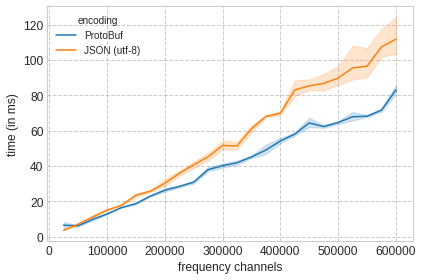

In [13]:
df = create_dataframe(num_iter, channels, protobuf_decoding_time, utf_decoding_time)
plot_decoding_time(df)